In [1]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [2]:
__author__ = "Uddeepta Deka"
import numpy as np
import matplotlib.pyplot as plt

## Problem

Consider a circle made of test particles. Derive the effect of Gravitational Waves (GWs) on the particles in the proper reference frame of the test particle at the centre of the circle. Consider the following cases:
- for `+` polarized GWs
- for `x` polarized GWs
- for circularly (right and left separately) polarized GWs
- for elliptically polarized GWs

## Solution

The geodesic deviation equation in the proper detector frame reads:
\begin{equation}
    \ddot{\xi}^i = \frac{1}{2}\ddot{h}_{ij}^{TT}\xi^j
\end{equation}
where 
\begin{equation}
    \xi^i = (x_0 + \delta x_0, y_0+\delta y_0, z_0 + \delta z_0)
\end{equation}
For a wave travelling in the $z$ direction, $h_{3j}^{TT} = 0$.

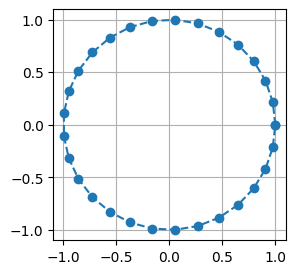

In [3]:
# Initial configuration
r0 = 1. # radius of the initial circular arrangement of particles
num_particles = 30 # number of particles
x0 = r0 * np.cos(np.linspace(0,2.* np.pi, num_particles))
y0 = r0 * np.sin(np.linspace(0,2.* np.pi, num_particles))

dt = np.pi / 2. # time steps
times = np.arange(0. , 2*np.pi + dt, dt)

plt.figure(figsize=(3,3))
plt.grid()
plt.plot(x0, y0, marker='o', linestyle='--')
plt.show()

### `+` and `x` polarizations

For the `+` polarization:
\begin{equation}
    h_{ab}^{TT} = h_+\sin\omega t 
    \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
    \end{pmatrix}
\end{equation}
where $a, b = 1, 2$.

Therefore, the geodesic equation gives:
\begin{align}
    \delta x(t) &= \frac{h_+}{2} x_0\sin\omega t\\
    \delta y(t) &= -\frac{h_+}{2} y_0\sin\omega t
\end{align}

For the `x` polarization:
\begin{equation}
    h_{ab}^{TT} = h_x\sin\omega t 
    \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix}
\end{equation}
where $a, b = 1, 2$. 

Therefore, the geodesic equation gives:
\begin{align}
    \delta x(t) &= \frac{h_x}{2} y_0\sin\omega t\\
    \delta y(t) &= \frac{h_x}{2} x_0\sin\omega t
\end{align}

In [4]:
def devn_plus(t, hp, x0, y0, omega):
    """ Returns the deviations in x and y directions for + polarization wave """
    dx = 0.5 * hp * x0 * np.sin(omega * t)
    dy = -0.5 * hp * y0 * np.sin(omega * t)
    return dx, dy

In [5]:
def devn_cross(t, hc, x0, y0, omega):
    """ Returns the deviations in x and y directions for x polarization wave """
    dx = 0.5 * hc * y0 * np.sin(omega * t)
    dy = 0.5 * hc * x0 * np.sin(omega * t)
    return dx, dy

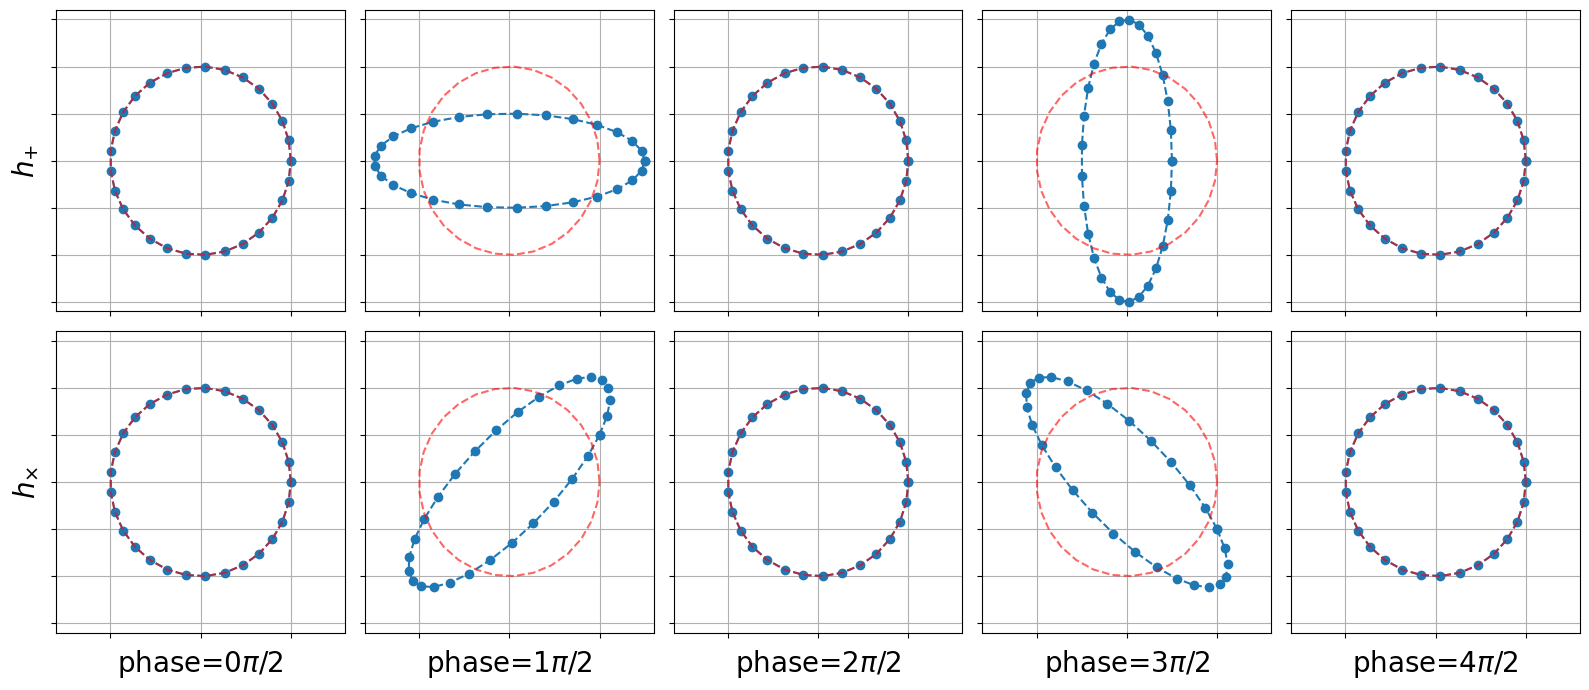

In [8]:
hp = 1
w = 1.
fig, (ax1, ax2) = plt.subplots(ncols=len(times), nrows=2, figsize=(16, 7))
for i, t in enumerate(times):
    dx, dy = devn_plus(t, hp, x0, y0, w)
    ax1[i].plot(x0 + dx, y0 + dy, marker='o', linestyle='--')
    ax1[i].plot(x0, y0, linestyle='--', c='r',alpha=0.6)
    ax1[i].set_xlim(-1.6, 1.6)
    ax1[i].set_ylim(-1.6, 1.6)
    ax1[i].set_yticklabels([])
    ax1[i].set_xticklabels([])
    ax1[i].grid()
    # ax1[i].set_title(fr'phase={t/dt:.0f}$\pi/2$')
ax1[0].set_ylabel(r'$h_{+}$', size=20)
hc = 1
w = 1.

for i, t in enumerate(times):
    dx, dy = devn_cross(t, hc, x0, y0, w)
    ax2[i].plot(x0 + dx, y0 + dy, marker='o', linestyle='--')
    ax2[i].plot(x0, y0, linestyle='--', c='r',alpha=0.6)
    ax2[i].set_xlim(-1.6, 1.6)
    ax2[i].set_ylim(-1.6, 1.6)
    ax2[i].set_yticklabels([])
    ax2[i].set_xticklabels([])
    ax2[i].grid()
    ax2[i].set_xlabel(fr'phase={t/dt:.0f}$\pi/2$', size=20)
ax2[0].set_ylabel(r'$h_{\times}$', size=20)
plt.tight_layout()
plt.savefig("plus_and_cross_polarizations.png", transparent=True, dpi=500)

### Left and Right circular polarizations

For the left circular polarization (LCP):
\begin{equation}
    h_{ab}^{TT} = \frac{h_C}{\sqrt{2}}\sin\omega t 
    \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
    \end{pmatrix}
    - \frac{h_C}{\sqrt{2}}\cos\omega t 
    \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix}
\end{equation}
where $a, b = 1, 2$. 

Therefore, the geodesic equation gives:
\begin{align}
    \delta x(t) &= \frac{h_C}{2\sqrt{2}} (x_0 \sin\omega t - y_0 \cos\omega t)\\
    \delta y(t) &= -\frac{h_C}{2\sqrt{2}} (x_0 \cos\omega t + y_0 \sin\omega t)
\end{align}

In [8]:
def devn_lcp(t, hC, x0, y0, omega):
    """ Returns the deviations in x and y directions for left circularly polarized wave """
    dx = 0.5 * hC * (x0 * np.sin(omega * t) - y0 * np.cos(omega * t)) / np.sqrt(2)
    dy = - 0.5 * hC * (x0 * np.cos(omega * t) + y0 * np.sin(omega * t)) / np.sqrt(2)
    return dx, dy

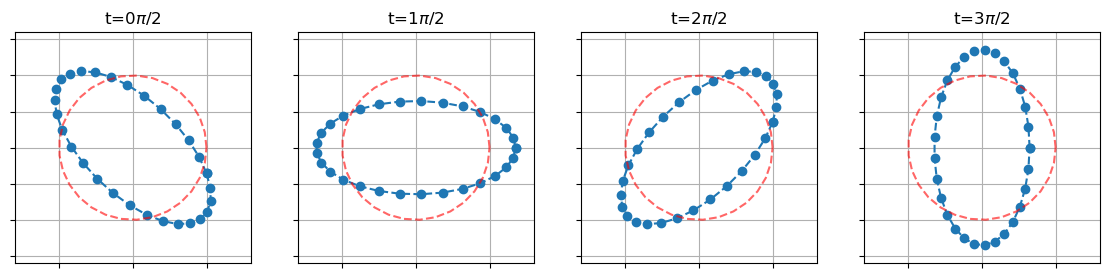

In [9]:
h = 1
w = 1.
fig, ax = plt.subplots(ncols=len(times), nrows=1, figsize=(14, 3))

for i, t in enumerate(times):
    dx, dy = devn_lcp(t, h, x0, y0, w)
    ax[i].plot(x0 + dx, y0 + dy, marker='o', linestyle='--')
    ax[i].plot(x0, y0, linestyle='--', c='r',alpha=0.6)
    ax[i].set_xlim(-1.6, 1.6)
    ax[i].set_ylim(-1.6, 1.6)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].grid()
    ax[i].set_title(fr't={t/dt:.0f}$\pi/2$')

For the right circular polarization (RCP):
\begin{equation}
    h_{ab}^{TT} = \frac{h_C}{\sqrt{2}}\sin\omega t 
    \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
    \end{pmatrix}
    + \frac{h_C}{\sqrt{2}}\cos\omega t 
    \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix}
\end{equation}
where $a, b = 1, 2$. 

Therefore, the geodesic equation gives:
\begin{align}
    \delta x(t) &= \frac{h_C}{2\sqrt{2}} (x_0 \sin\omega t + y_0 \cos\omega t)\\
    \delta y(t) &= \frac{h_C}{2\sqrt{2}} (x_0 \cos\omega t - y_0 \sin\omega t)
\end{align}

In [10]:
def devn_rcp(t, hC, x0, y0, omega):
    """ Returns the deviations in x and y directions for right circularly polarized wave """
    dx = 0.5 * hC * (x0 * np.sin(omega * t) + y0 * np.cos(omega * t)) / np.sqrt(2)
    dy = 0.5 * hC * (x0 * np.cos(omega * t) - y0 * np.sin(omega * t)) / np.sqrt(2)
    return dx, dy

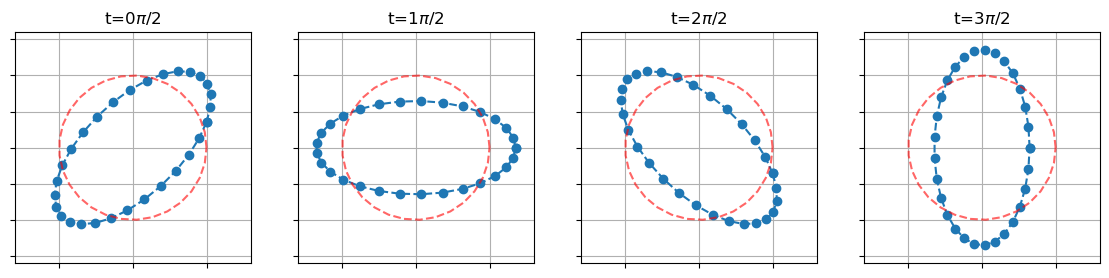

In [11]:
h = 1
w = 1.
fig, ax = plt.subplots(ncols=len(times), nrows=1, figsize=(14, 3))

for i, t in enumerate(times):
    dx, dy = devn_rcp(t, h, x0, y0, w)
    ax[i].plot(x0 + dx, y0 + dy, marker='o', linestyle='--')
    ax[i].plot(x0, y0, linestyle='--', c='r',alpha=0.6)
    ax[i].set_xlim(-1.6, 1.6)
    ax[i].set_ylim(-1.6, 1.6)
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].grid()
    ax[i].set_title(fr't={t/dt:.0f}$\pi/2$')

### Elliptical polarizations

For elliptical polarization:
\begin{equation}
    h_{ab}^{TT} = h_e\cos\phi\sin\omega t 
    \begin{pmatrix}
        1 & 0 \\
        0 & -1 \\
    \end{pmatrix}
    + h_e\sin\phi\cos\omega t
    \begin{pmatrix}
        0 & 1 \\
        1 & 0 \\
    \end{pmatrix}
\end{equation}
where $a, b = 1, 2$. 

Therefore, the geodesic equation gives:
\begin{align}
    \delta x(t) &= \frac{h_e}{2} (x_0 \cos\phi\sin\omega t + y_0 \sin\phi\cos\omega t)\\
    \delta y(t) &= \frac{h_e}{2} (x_0 \sin\phi\cos\omega t - y_0 \cos\phi\sin\omega t)
\end{align}

In [12]:
def devn_elliptic(t, he, x0, y0, omega, phi):
    """ Returns the deviations in x and y directions for right circularly polarized wave """
    dx = 0.5 * he * (x0 * np.sin(omega * t) * np.cos(phi) + y0 * np.cos(omega * t) * np.sin(phi))
    dy = 0.5 * he * (x0 * np.cos(omega * t) * np.sin(phi) - y0 * np.cos(phi) * np.sin(omega * t))
    return dx, dy

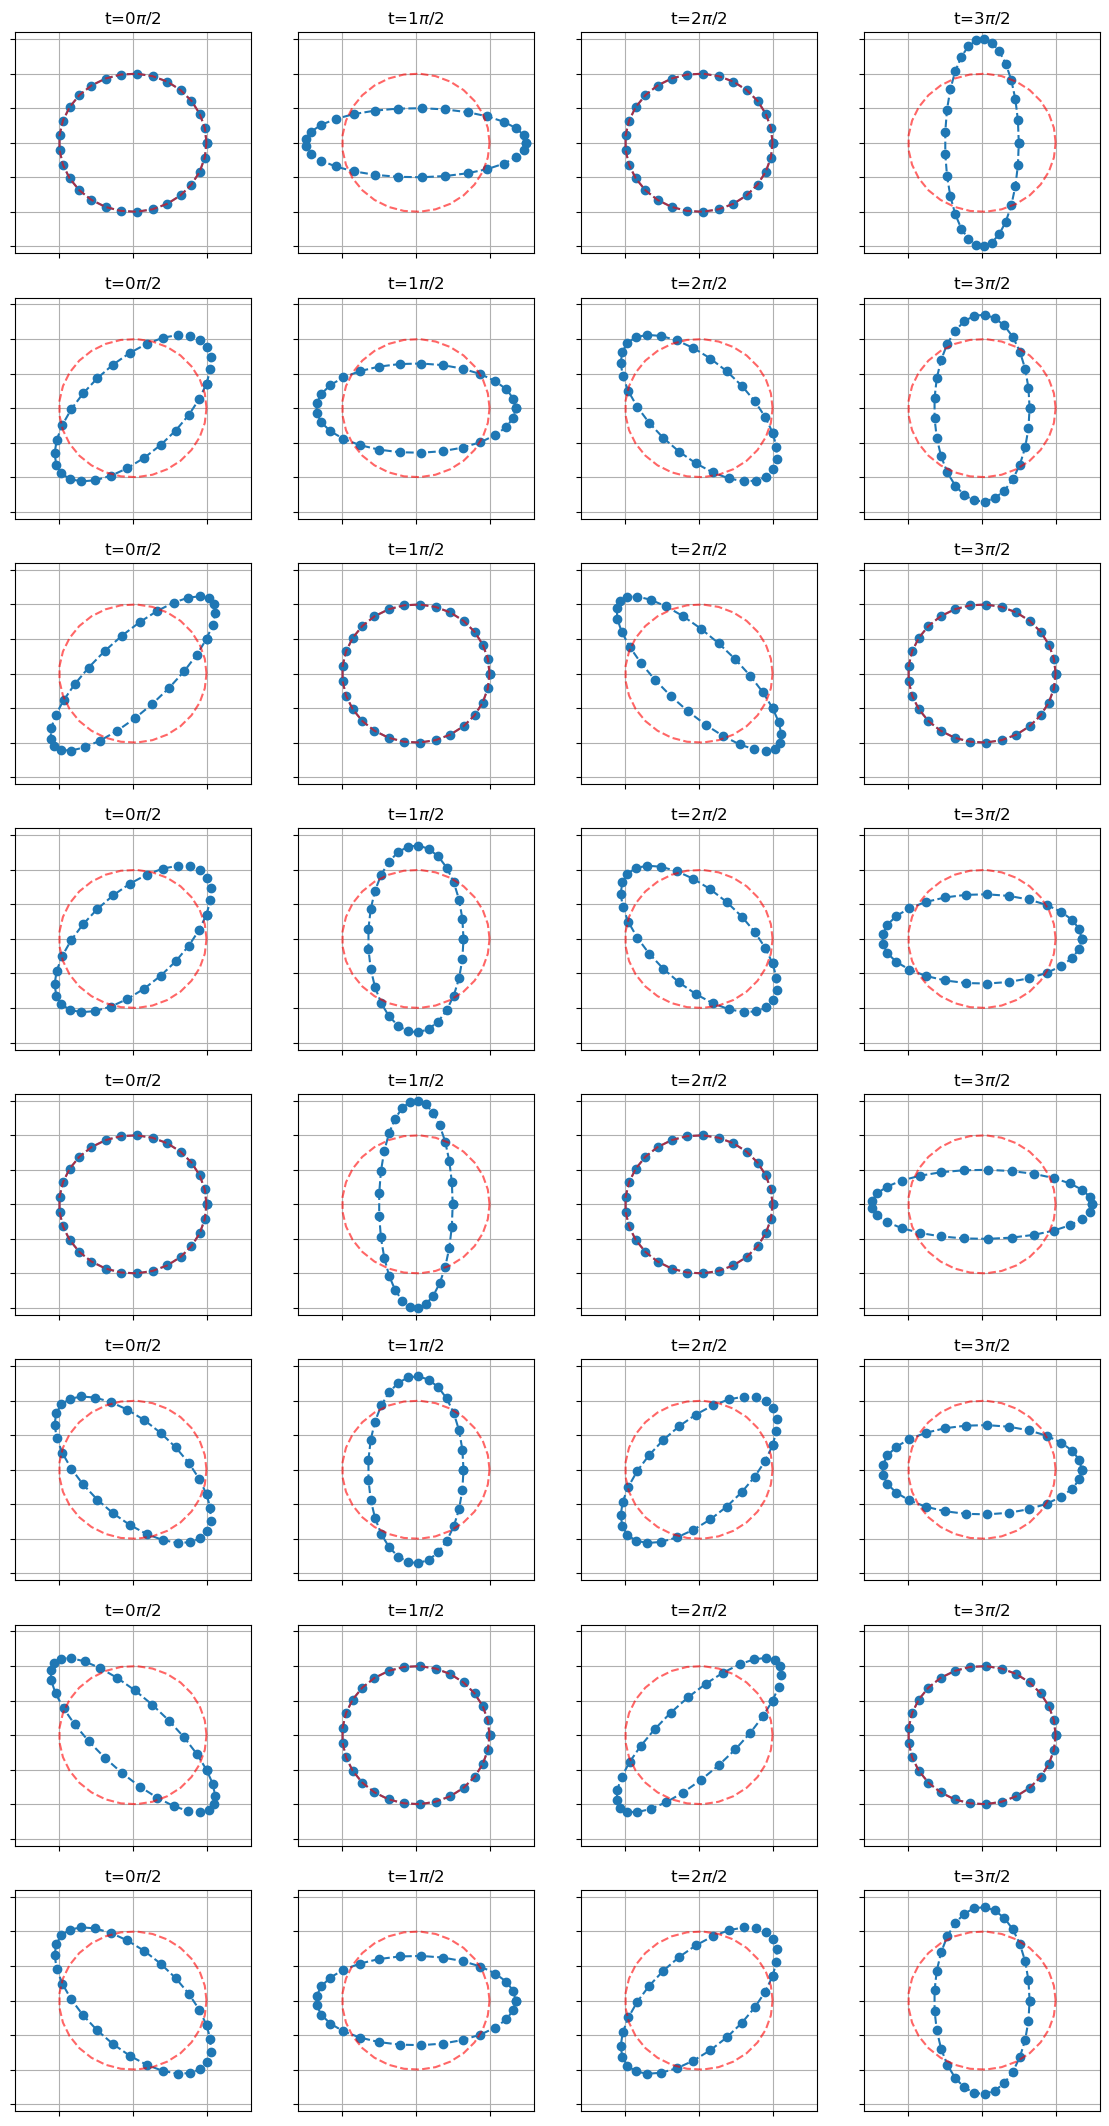

In [13]:
h = 1
w = 1.
phase = np.array([0., 1., 2., 3., 4., 5., 6., 7.]) * np.pi/4
fig, ax = plt.subplots(ncols=len(times), nrows=len(phase), figsize=(14, 27))
for j, ph in enumerate(phase):
    for i, t in enumerate(times):
        dx, dy = devn_elliptic(t, h, x0, y0, w, ph)
        ax[j][i].plot(x0 + dx, y0 + dy, marker='o', linestyle='--')
        ax[j][i].plot(x0, y0, linestyle='--', c='r',alpha=0.6)
        ax[j][i].set_xlim(-1.6, 1.6)
        ax[j][i].set_ylim(-1.6, 1.6)
        ax[j][i].set_yticklabels([])
        ax[j][i].set_xticklabels([])
        ax[j][i].grid()
        ax[j][i].set_title(fr't={t/dt:.0f}$\pi/2$')